# Unsupervised Clustering

In this project three unsupervised clustering models are used to discover structure in the data by organising them into groups whose members are similar:
- Naive K-Means Clustering 
- Hierarchichal Clustering
- Model-Based Clustering (GMM)

Importing libraries, loading data and standardising it:

In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the Data
column_names = [
    "Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis Angle", 
    "Sacral Slope", "Pelvic Radius", "Grade of Spondylolisthesis", "Class"
]

df = pd.read_csv(r'C:\Users\sarah\OneDrive\Documents\Msc\stats and ML 2\coursework\data.txt', 
                 delim_whitespace=True, 
                 header=None, 
                 names=column_names)

# Standardise the Data
feature_columns = [
    "Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis Angle", 
    "Sacral Slope", "Pelvic Radius", "Grade of Spondylolisthesis"
]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_columns]), columns=feature_columns)


# K-Means Method

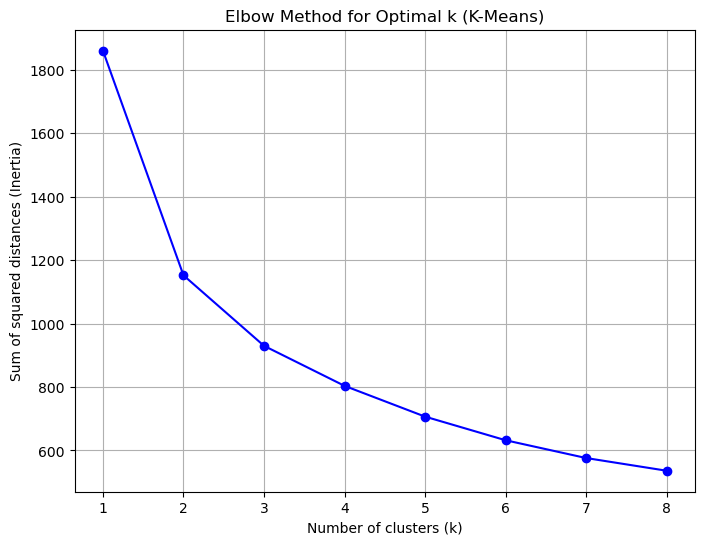

In [2]:
# Determine Optimal K using Elbow Method for K-Means
kMin = 1
kMax = 8
repsPerK = 10

kValues = np.arange(kMin, kMax + 1)
SumOfSquares = np.zeros(len(kValues))

for i, k in enumerate(kValues):
    kmeans = KMeans(n_clusters=k, n_init=repsPerK, random_state=42)
    kmeans.fit(df_scaled)
    SumOfSquares[i] = kmeans.inertia_

# Plotting the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(kValues, SumOfSquares, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.grid(True)
plt.show()

The Elbow plot suggests that optimal K is between 2-3, here we choose k = 2

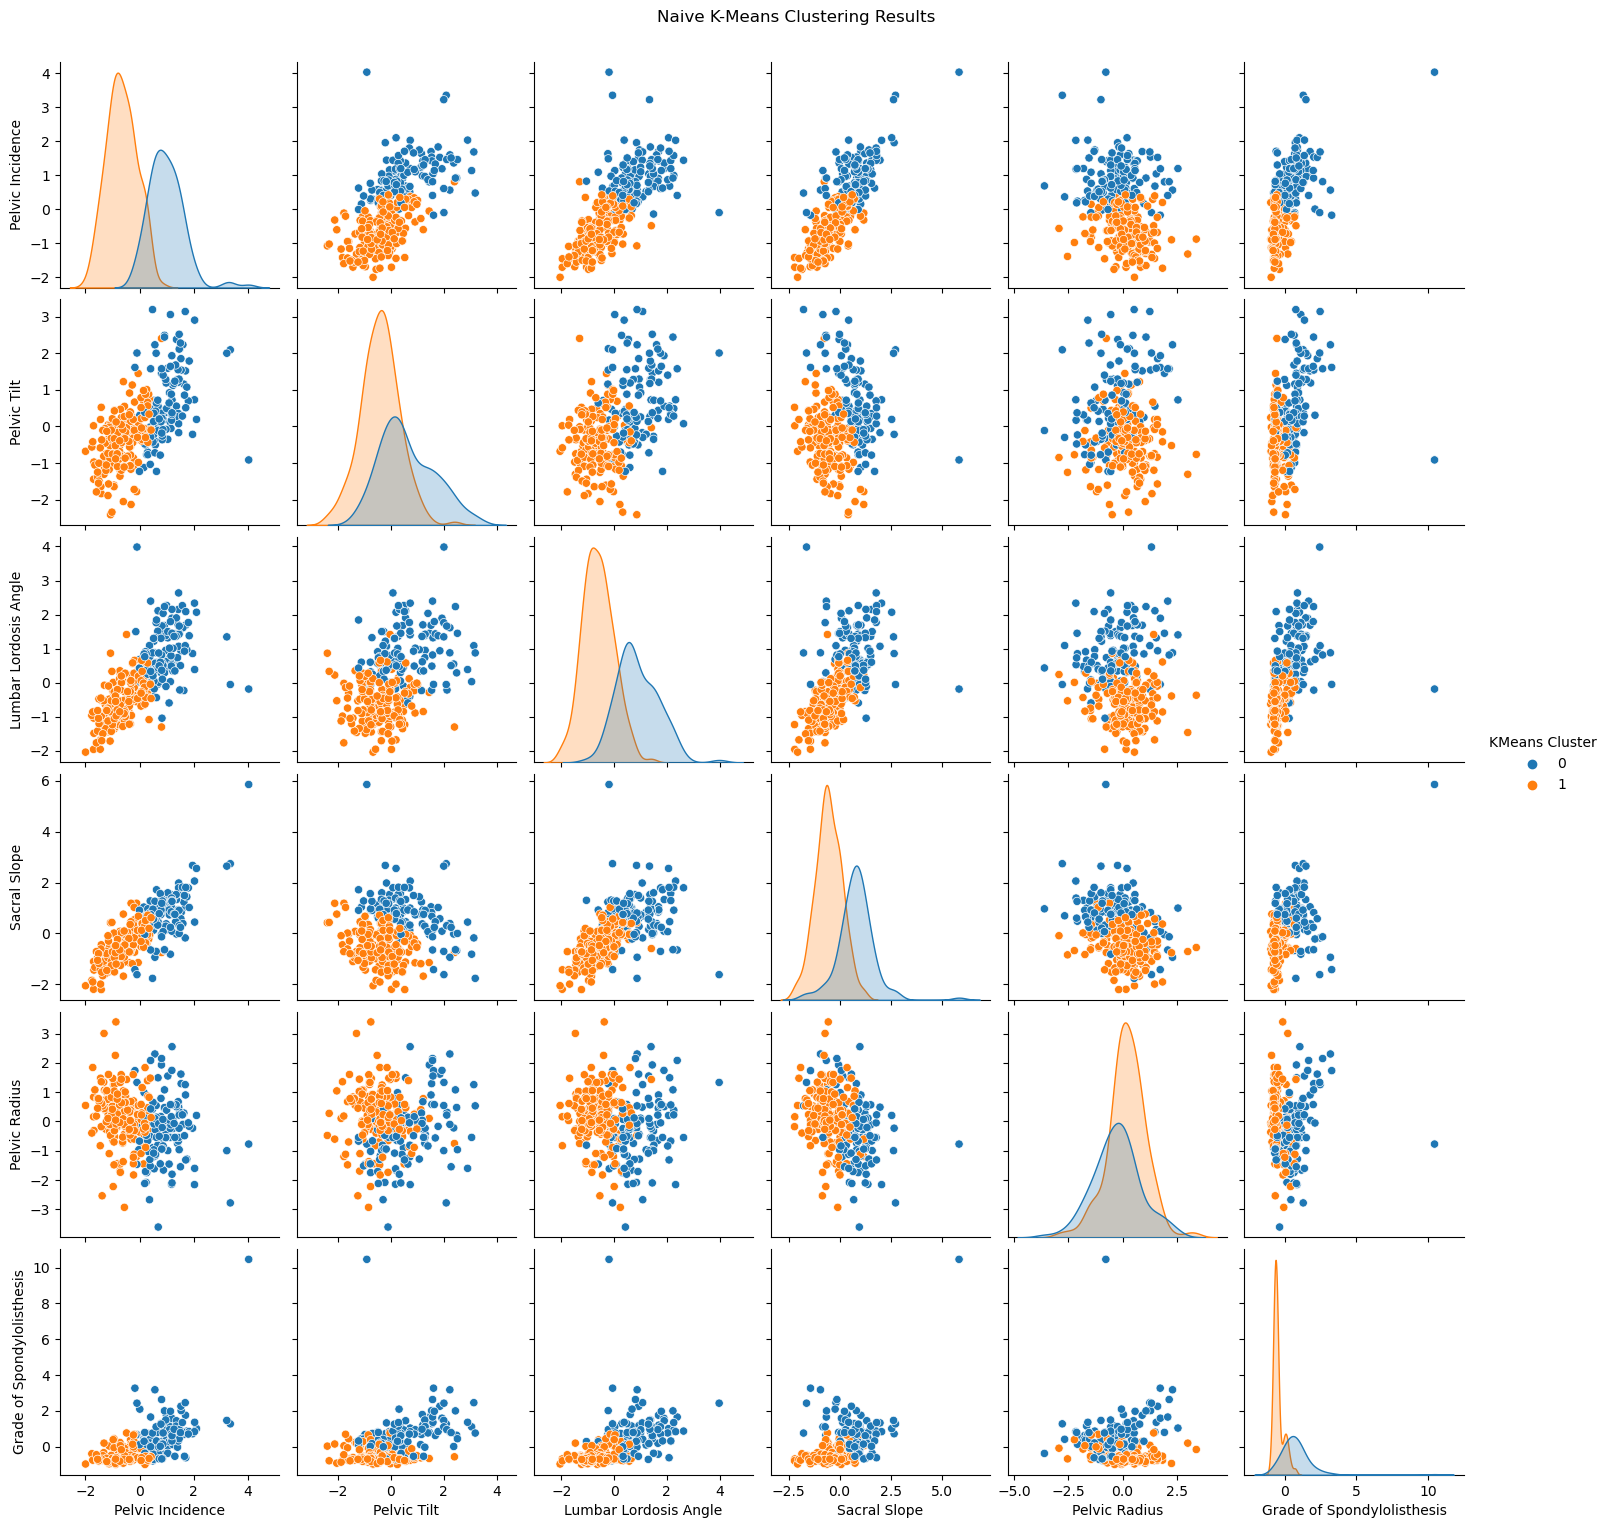

In [3]:
# Applying Naive K-Means with Optimal K
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, n_init=repsPerK, random_state=42)
df_scaled['KMeans Cluster'] = kmeans.fit_predict(df_scaled[feature_columns])

# Visualising K-Means Clustering
sns.pairplot(df_scaled, hue='KMeans Cluster', diag_kind='kde')
plt.suptitle('Naive K-Means Clustering Results', y=1.02)
plt.show()

# Hierarchical Clustering Method
Using Agglomerative Clustering with Ward's method, also using the same optimal K as before to maintain consitency- which here is k = 2

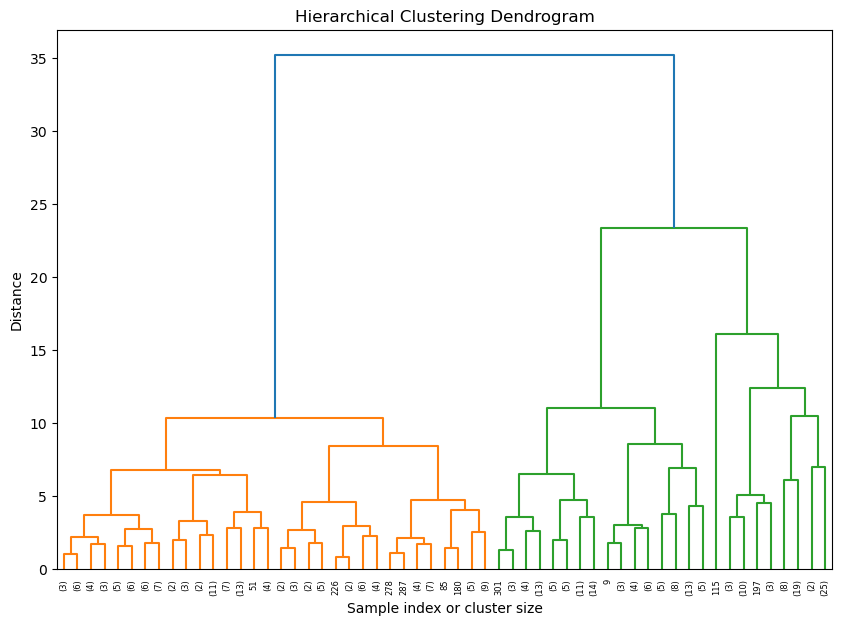

In [4]:
# Hierarchical Clustering (Dendrogram)
linked = linkage(df_scaled[feature_columns], method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or cluster size')
plt.ylabel('Distance')
plt.show()

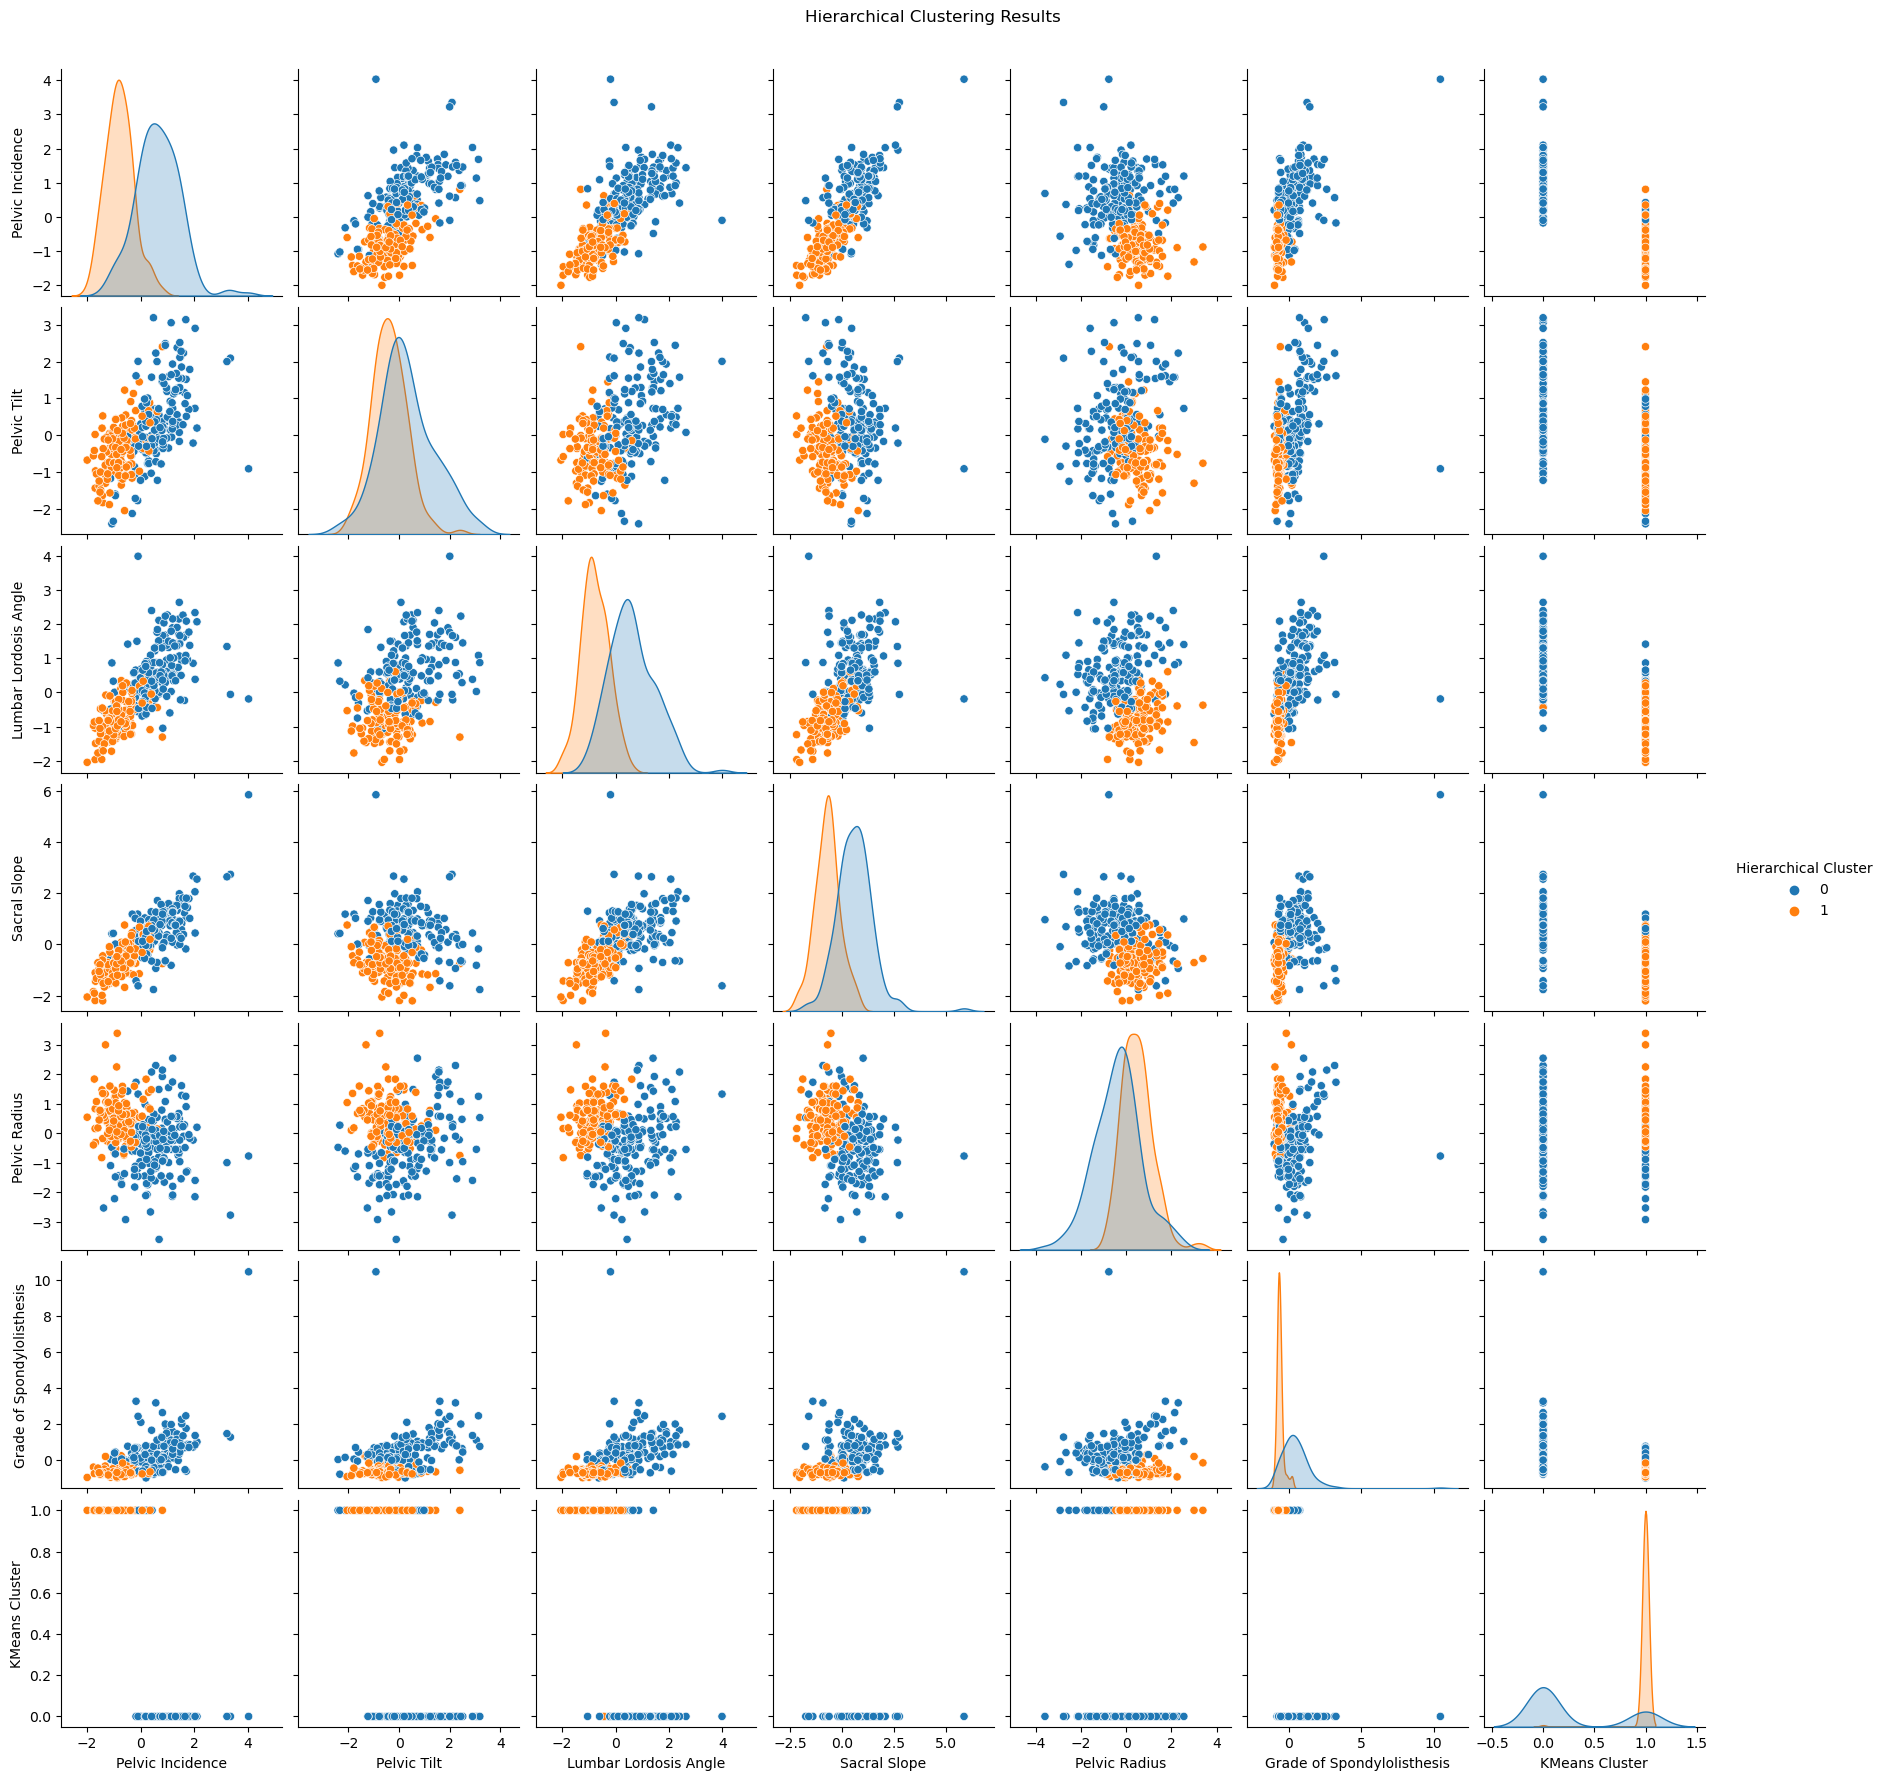

In [6]:
# Applying Agglomerative Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df_scaled['Hierarchical Cluster'] = hierarchical_model.fit_predict(df_scaled[feature_columns])

# Visualising Hierarchical Clusters
sns.pairplot(df_scaled, hue='Hierarchical Cluster', diag_kind='kde')
plt.suptitle('Hierarchical Clustering Results', y=1.02)
plt.show()

# Model-Based Clustering (GMM)
Applying a Gaussian Mixture Model (GMM) with 2 clusters 

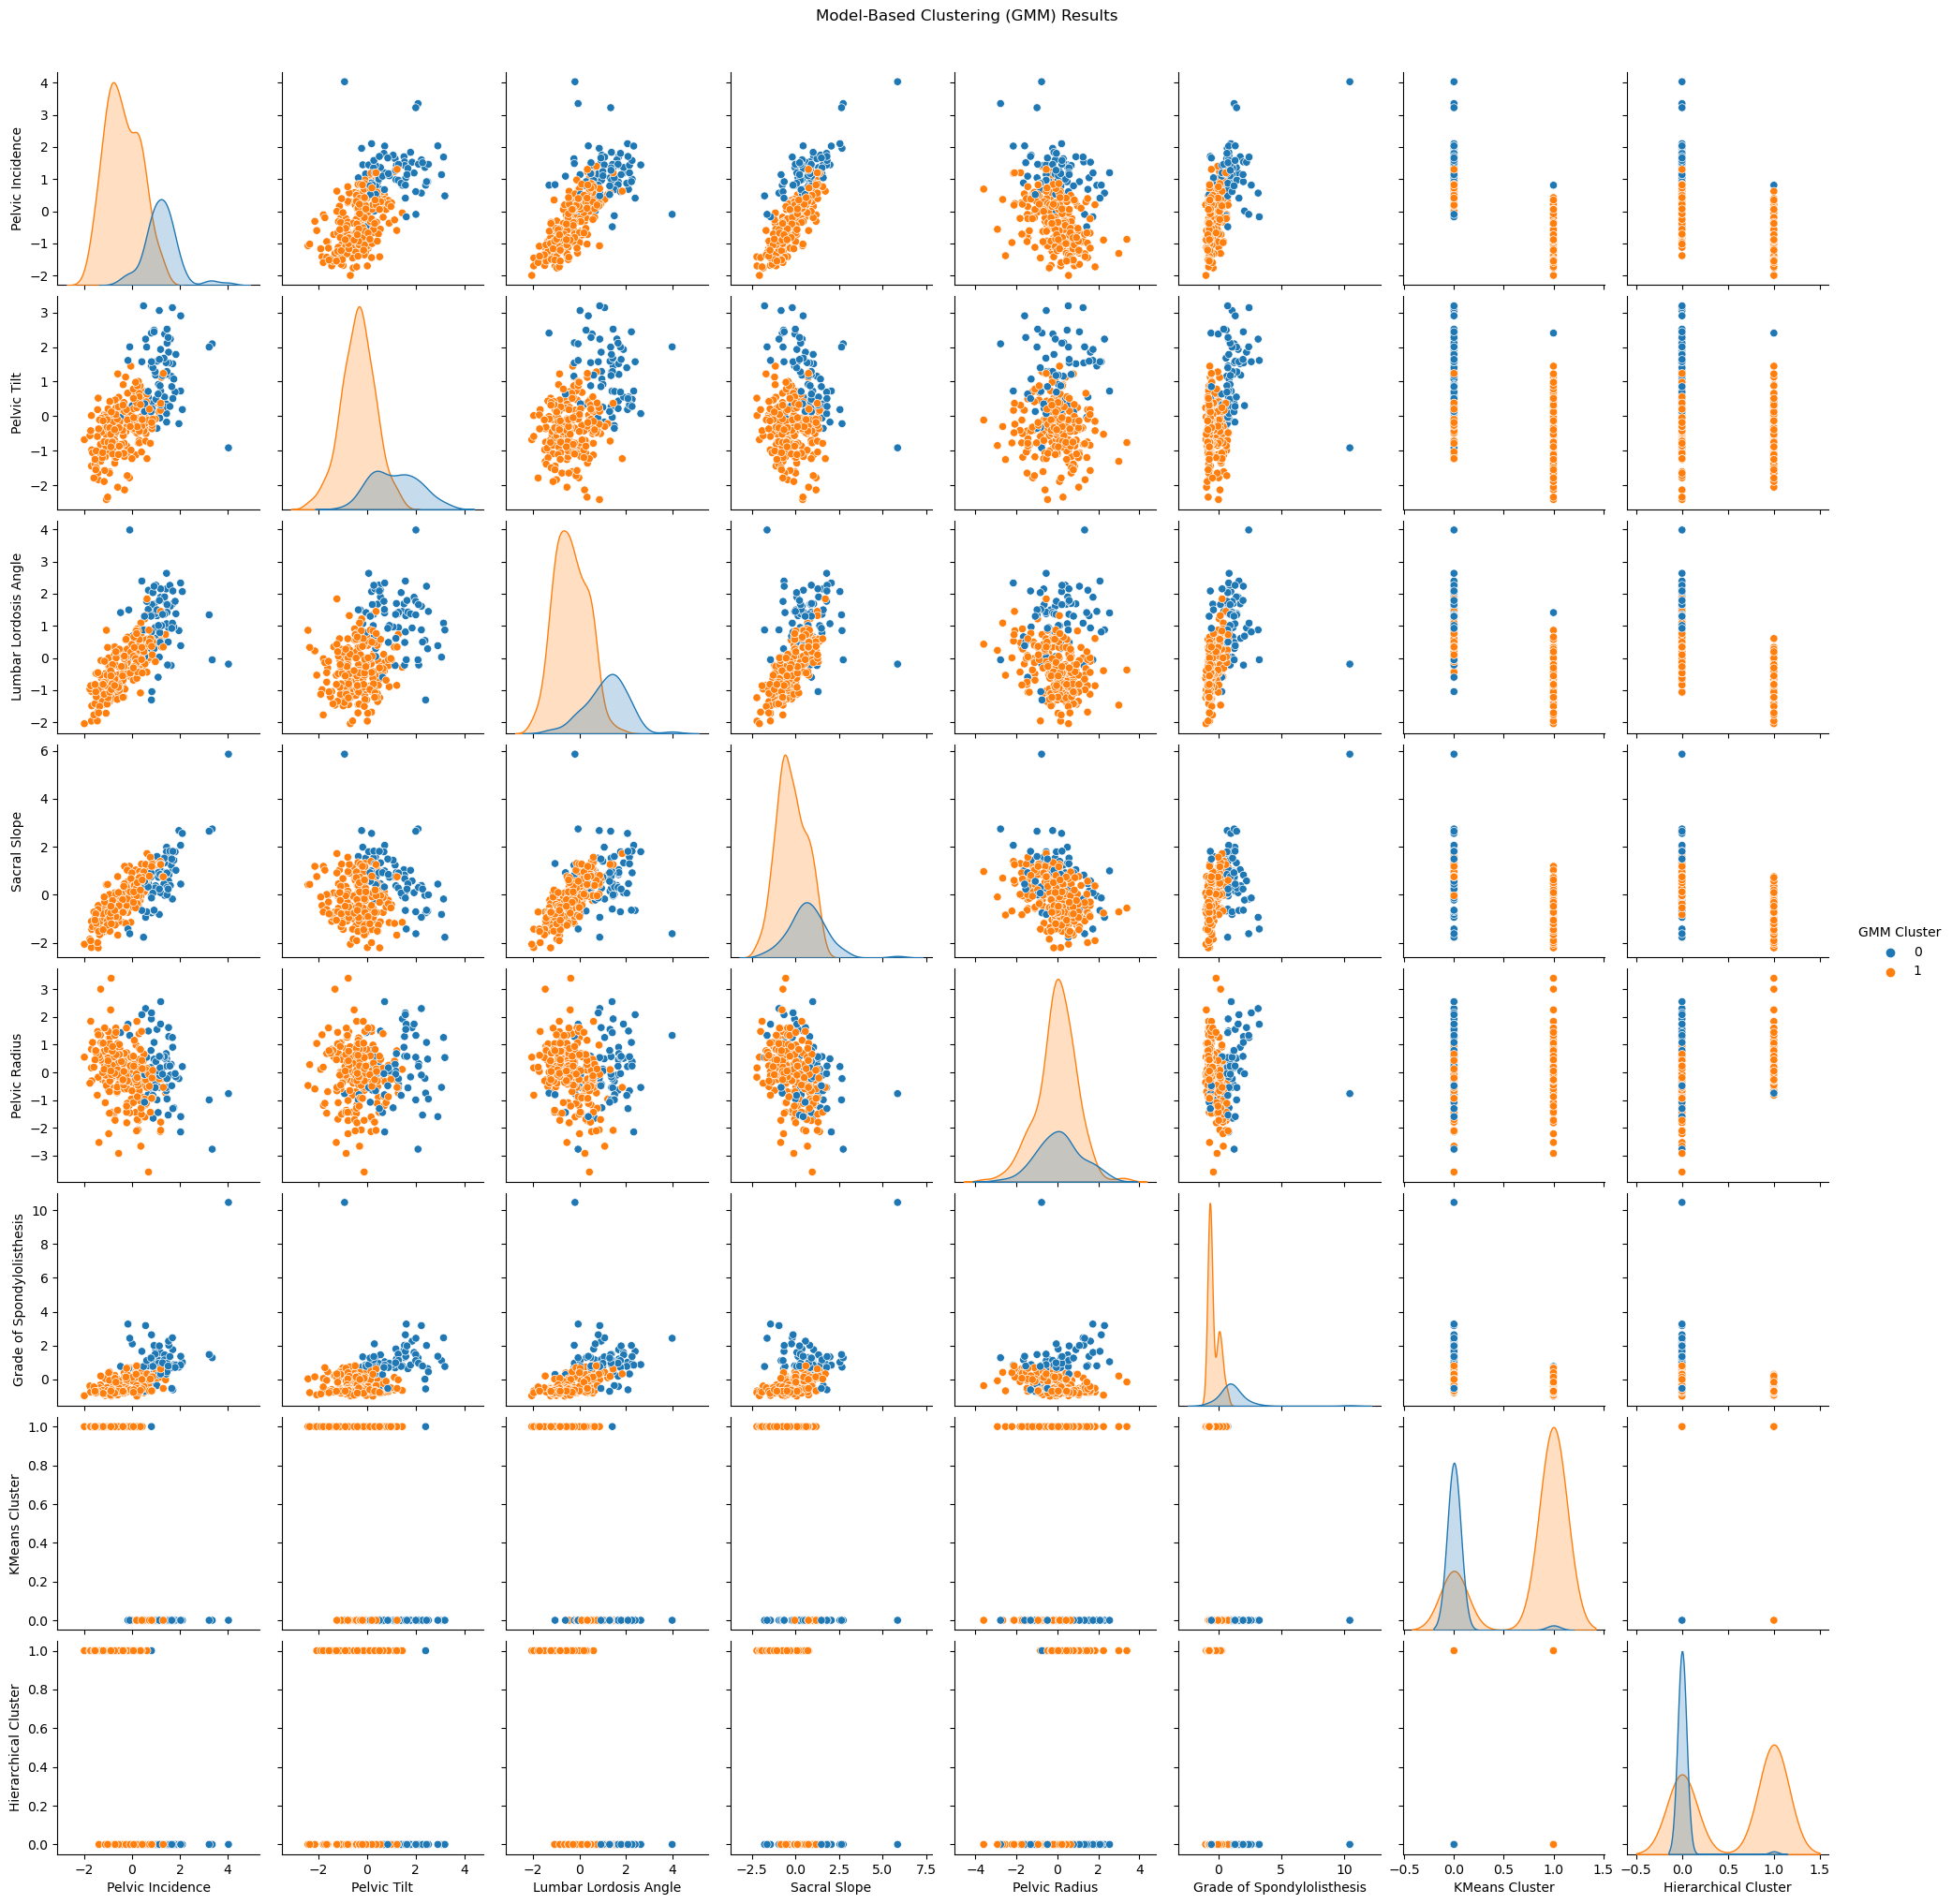

In [7]:
# Model-Based Clustering (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df_scaled['GMM Cluster'] = gmm.fit_predict(df_scaled[feature_columns])

# Visualising GMM Clustering
sns.pairplot(df_scaled, hue='GMM Cluster', diag_kind='kde')
plt.suptitle('Model-Based Clustering (GMM) Results', y=1.02)
plt.show()

# Evaluating Models using silhouette scores:

In [8]:
# Silhouette Scores to Evaluate Cluster Quality
for method in ['KMeans Cluster', 'Hierarchical Cluster', 'GMM Cluster']:
    score = silhouette_score(df_scaled[feature_columns], df_scaled[method])
    print(f'Silhouette Score for {method}: {score:.4f}')

Silhouette Score for KMeans Cluster: 0.3629
Silhouette Score for Hierarchical Cluster: 0.3029
Silhouette Score for GMM Cluster: 0.3656


GMM has the highest silhouette score (0.3656), suggesting it is the most effective model among the three.
The K-Means score is also decent (0.3629), indicating that this method is not far behind.
Hierarchical Clustering has a lower score (0.3029), meaning it may not fit the data as well as the other methods.

GMM scores the highest, we experiment with k values for GMM method:

In [9]:
#Experimenting with k values
for k in range(2, 6):
    gmm = GaussianMixture(n_components=k, random_state=42)
    cluster_labels = gmm.fit_predict(df_scaled[feature_columns])
    score = silhouette_score(df_scaled[feature_columns], cluster_labels)
    print(f'Silhouette Score for GMM with {k} clusters: {score:.4f}')

Silhouette Score for GMM with 2 clusters: 0.3656
Silhouette Score for GMM with 3 clusters: 0.2264
Silhouette Score for GMM with 4 clusters: 0.1942
Silhouette Score for GMM with 5 clusters: 0.1266


The highest score is with clusters, reinforcing the decision to use k = 2.
Increasing the number of clusters reduces the silhouette score, indicating poorer clustering quality with more clusters.
This behaviour suggests that the data might not naturally separate into more than 2 clusters.
